In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Data reading
df = pd.read_excel("clusters_wo_KO_sorted_EC.xlsx")
df.drop(df.columns[13:100], axis=1, inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop([140], axis=0, inplace=True)

print(df)

              Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  \
0    YALI0_B19602g     TF010          MGF2  -2.41  -1.38    0.0   0.00   
1    YALI0_E31383g     TF051             -  -0.84  -0.45    0.0  -0.26   
2    YALI0_B21582g     TF095          MHY1  -1.15  -0.84    0.0   0.18   
3    YALI0_D10681g     TF031             -  -0.77  -0.80    0.0   0.00   
4    YALI0_E20251g     TF136             -  -1.22  -0.70    0.0   0.22   
..             ...       ...           ...    ...    ...    ...    ...   
135  YALI0_E20449g     TF100          YOX1   0.20   0.22    0.0   0.00   
136  YALI0_D05041g     TF126          KLF1   0.00   0.00    0.0   0.00   
137  YALI0_E18304g     TF127        ERT1-1   0.26   0.00    0.0   0.00   
138  YALI0_C18645g     TF121         ARO80   0.84   0.00    0.0  -0.28   
139  YALI0_D14872g     TF034             -  -2.15  -0.64    1.3   1.40   

     HAC_scYFP  OE_inRedStar  OE_normalized_inRedStar  Clusters     order  
0         0.00      0.831257       

In [2]:
df.rename(columns={'OE_inRedStar': 'OE_rProt_total', 'OE_normalized_inRedStar': 'OE_rProt_normalized',
                               'HAC_scYFP': 'scYFP_HAC1'}, inplace=True)

df['Gene'] = df['Gene'].str.replace('YALI0_', '').str.replace('g', '')

print(df.head())



     Gene TF number Assigned name  scSoA  scYFP  inYFP  scTlG  scYFP_HAC1  \
0  B19602     TF010          MGF2  -2.41  -1.38    0.0   0.00        0.00   
1  E31383     TF051             -  -0.84  -0.45    0.0  -0.26       -0.49   
2  B21582     TF095          MHY1  -1.15  -0.84    0.0   0.18        0.00   
3  D10681     TF031             -  -0.77  -0.80    0.0   0.00        0.00   
4  E20251     TF136             -  -1.22  -0.70    0.0   0.22        0.00   

   OE_rProt_total  OE_rProt_normalized  Clusters     order  
0        0.831257             0.863899       0.0 -0.493124  
1        0.973174             0.987381       0.0 -0.177804  
2        0.918531             0.913418       0.0 -0.148578  
3        0.819745             0.874550       0.0 -0.125043  
4        1.000000             1.000000       0.0 -0.116667  


In [4]:
# New assigned names - PKW

#df.loc[df['TF number'] == 'TF116', 'Assigned name'] = 'ADR1'


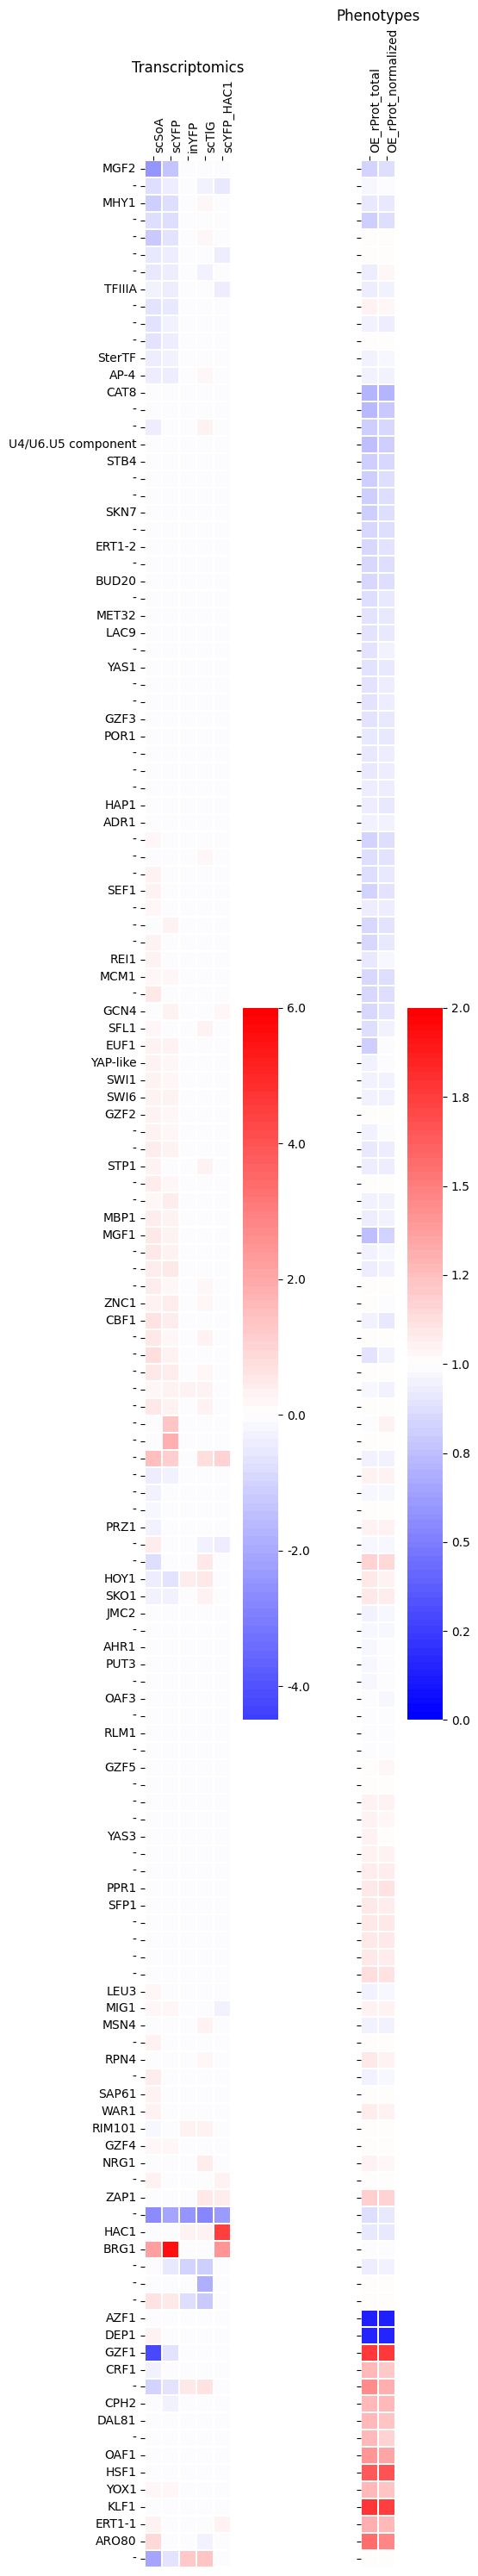

In [3]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import seaborn as sns


# Define the numeric data and row labels
numeric_data1 = df.iloc[:, 3:8]
numeric_data2 = df.iloc[:, 8:10]
row_labels = df['Assigned name']

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 30), sharey=True)

# Plot the first heatmap
sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, 
            cbar=True, linewidths=0.05, square=True, vmin=-4.5, vmax=6, cbar_kws={'format': '%.1f'})
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, 
            cbar=True, linewidths=0.05, square=True, vmin=0, vmax=2, cbar_kws={'format': '%.1f'})
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()

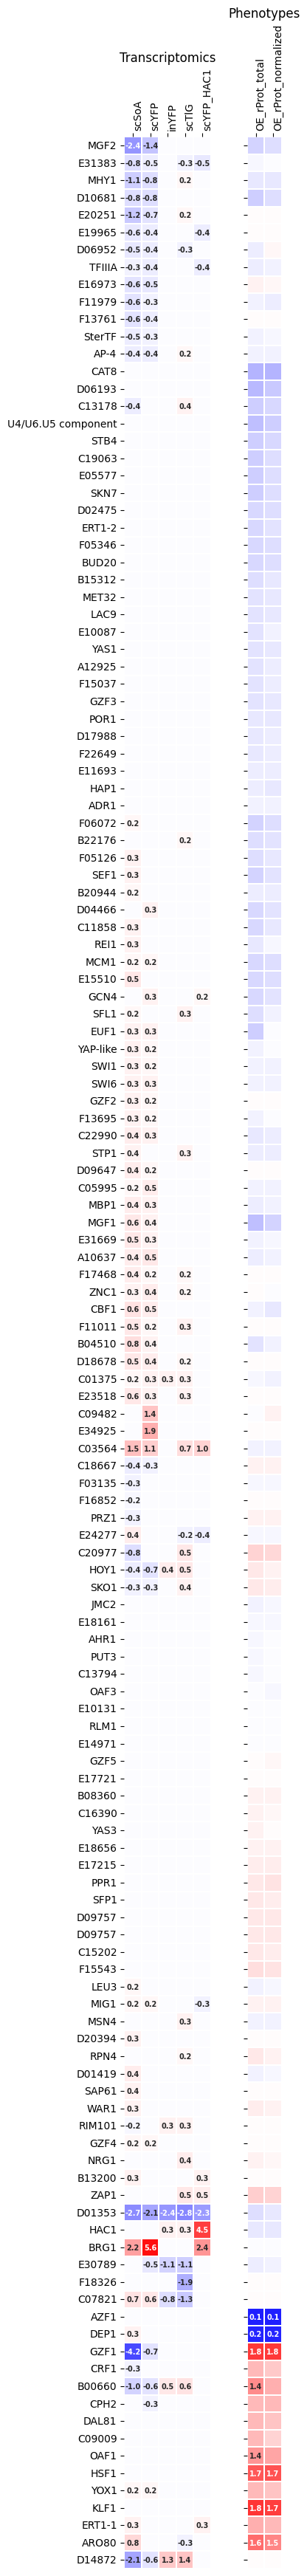

In [4]:
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Define the numeric data and row labels
numeric_data1 = df.iloc[:, 3:8]
numeric_data2 = df.iloc[:, 8:10]

row_labels = [gene if assigned_name == '-' else assigned_name 
              for assigned_name, gene in zip(df['Assigned name'], df['Gene'])]

# Create a custom colormap
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=100)

annot_kws = {"size": 7, "weight": "bold"}


# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 35), sharey=True)

# Plot the first heatmap
annot_data1 = numeric_data1.map(lambda x: f'{x:.1f}' if x != 0 else '')

# Create a blank annotation matrix for numeric_data2
annot_data2 = pd.DataFrame('', index=numeric_data2.index, columns=numeric_data2.columns)

# Specify annotations for chosen variants
annotations2 = {
    'OE_rProt_total': ['TF003', 'TF037', 'TF068', 'TF119', 'TF121', 'TF124', 'TF126', 'TF128'],
    'OE_rProt_normalized': ['TF037', 'TF068', 'TF121', 'TF124', 'TF126', 'TF128'],
}

# Add annotations based on specified genes
for column, genes in annotations2.items():
    for gene in genes:
        if gene in df['TF number'].values:
            annot_data2.loc[df['TF number'] == gene, column] = numeric_data2.loc[df['TF number'] == gene, column].apply(lambda x: f'{x:.1f}')


sns.heatmap(numeric_data1, ax=ax1, yticklabels=row_labels, cmap=cmap, center=0, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data1, fmt='', annot_kws=annot_kws,
            vmin=-4.5, vmax=6, cbar_kws={'format': '%.1f'})
ax1.xaxis.tick_top()
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='left')
ax1.set_title('Transcriptomics')

# Plot the second heatmap
sns.heatmap(numeric_data2, ax=ax2, yticklabels=row_labels, cmap=cmap, center=1, cbar=False, 
            linewidths=0.05, square=True, annot=annot_data2, fmt='', annot_kws=annot_kws,
            vmin=0, vmax=2, cbar_kws={'format': '%.1f'})
ax2.xaxis.tick_top()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha='left')
ax2.set_title('Phenotypes')

# Adjust the layout
plt.tight_layout()
plt.show()
